## Observations and Insights 

In [187]:
%matplotlib inline

In [188]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data = pd.merge(mouse_metadata,study_results, how='outer')
# Display the data table for preview
all_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [189]:
# Checking the number of mice.
num_mice = all_data['Mouse ID'].count()
num_mice

1893

In [190]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
all_data_copy = all_data.copy()
duplicates = all_data_copy[all_data_copy.duplicated(['Mouse ID', 'Timepoint'])]
duplicates['Mouse ID']

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [191]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [192]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexes = duplicates.index.to_list()
clean_all_data = all_data_copy.drop(all_data_copy.index[[indexes]])
clean_all_data.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [193]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = clean_all_data['Mouse ID'].count()
clean_num_mice

1888

## Summary Statistics

In [194]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats = round(clean_all_data.describe(),2)
stats
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_trx_mean = round(clean_all_data.groupby('Drug Regimen').mean(),2)
drug_trx_mean



,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.46,19.97,21.57,40.68,0.71
Ceftamin,13.25,27.40,19.75,52.59,1.18
Infubinol,16.23,27.20,18.17,52.88,0.96
Ketapril,15.66,27.86,19.71,55.24,1.30
Naftisol,12.00,27.17,19.62,54.33,1.18
Placebo,10.73,27.93,18.67,54.03,1.44
Propriva,10.57,27.08,17.08,52.39,1.00
Ramicane,10.68,19.68,21.43,40.22,0.55
Stelasyn,12.78,27.86,19.23,54.23,0.87


In [195]:
drug_trx_median = round(clean_all_data.groupby('Drug Regimen').median(),2)
drug_trx_median

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,16.5,20.5,20.0,41.56,0.0
Ceftamin,12.0,28.0,20.0,51.78,1.0
Infubinol,20.0,27.0,15.0,51.82,1.0
Ketapril,18.0,28.0,20.0,53.70,1.0
Naftisol,9.0,27.0,20.0,52.51,1.0
Placebo,10.0,28.0,15.0,52.29,1.0
Propriva,8.0,26.0,15.0,50.91,1.0
Ramicane,9.0,19.0,20.0,40.67,0.0
Stelasyn,14.0,28.0,20.0,52.43,1.0


In [196]:
drug_trx_stdev = round(clean_all_data.groupby('Drug Regimen').std(),2)
drug_trx_stdev

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,7.72,2.73,14.38,4.99,0.85
Ceftamin,8.07,1.58,14.28,6.27,1.18
Infubinol,7.51,2.18,13.47,6.57,1.03
Ketapril,6.02,1.84,14.03,8.28,1.39
Naftisol,6.72,1.50,14.18,8.13,1.22
Placebo,6.35,1.84,13.89,7.82,1.34
Propriva,7.19,1.69,13.57,6.57,1.09
Ramicane,5.95,3.24,14.28,4.85,0.69
Stelasyn,7.94,1.64,13.84,7.71,0.97


In [197]:
drug_trx_sterr = round(clean_all_data.groupby('Drug Regimen').sem(),2)
drug_trx_sterr

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,0.51,0.18,0.95,0.33,0.06
Ceftamin,0.60,0.12,1.07,0.47,0.09
Infubinol,0.56,0.16,1.01,0.49,0.08
Ketapril,0.44,0.13,1.02,0.60,0.10
Naftisol,0.49,0.11,1.04,0.60,0.09
Placebo,0.47,0.14,1.03,0.58,0.10
Propriva,0.58,0.14,1.09,0.53,0.09
Ramicane,0.39,0.21,0.95,0.32,0.05
Stelasyn,0.59,0.12,1.03,0.57,0.07


In [198]:
# Assemble the resulting series into a single summary dataframe.
drug_trx_stats = drug_trx_mean.join(drug_trx_median, on= 'Drug Regimen',lsuffix="_Mean", rsuffix="_Median")
drug_trx_stats = drug_trx_stats.join(drug_trx_stdev, on= 'Drug Regimen',lsuffix="_Median", rsuffix="_StDev")
drug_trx_stats = drug_trx_stats.join(drug_trx_sterr, on= 'Drug Regimen',lsuffix="_StDev", rsuffix="_StErr")
drug_trx_stats = drug_trx_stats.rename(columns = {'Age_months_Mean': 'Mean Age in Months', 'Weight (g)_Mean': 'Mean Weight (g)','Timepoint_Mean': 'Mean Timepoint', 'Tumor Volume (mm3)_Mean': 'Mean Tumor Volume (mm3)','Metastatic Sites_Mean': 'Mean Metastatic Sites', 'Age_months_Median': 'Median Age in Months', 'Weight (g)_Median': 'Median Weight (g)','Timepoint_Median': 'Median Timepoint', 'Tumor Volume (mm3)_Median': 'Median Tumor Volume (mm3)','Metastatic Sites_Median': 'Median Metastatic Sites', 'Age_months_StDev': 'StDev Age in Months', 'Weight (g)_StDev': 'StDev Weight (g)','Timepoint_StDev': 'StDev Timepoint', 'Tumor Volume (mm3)_StDev': 'StDev Tumor Volume (mm3)','Metastatic Sites_StDev': 'StDev Metastatic Sites', 'Age_months_StErr': 'StErr Age in Months', 'Weight (g)_StErr': 'StErr Weight (g)','Timepoint_StErr': 'StErr Timepoint', 'Tumor Volume (mm3)_StErr': 'StErr Tumor Volume (mm3)','Metastatic Sites_StErr': 'StErr Metastatic Sites'})
drug_trx_stats

,Mean Age in Months,Mean Weight (g),Mean Timepoint,Mean Tumor Volume (mm3),Mean Metastatic Sites,Median Age in Months,Median Weight (g),Median Timepoint,Median Tumor Volume (mm3),Median Metastatic Sites,StDev Age in Months,StDev Weight (g),StDev Timepoint,StDev Tumor Volume (mm3),StDev Metastatic Sites,StErr Age in Months,StErr Weight (g),StErr Timepoint,StErr Tumor Volume (mm3),StErr Metastatic Sites
Drug Regimen,,,,,,,,,,,,,,,,,,,,
Capomulin,13.46,19.97,21.57,40.68,0.71,16.5,20.5,20.0,41.56,0.0,7.72,2.73,14.38,4.99,0.85,0.51,0.18,0.95,0.33,0.06
Ceftamin,13.25,27.40,19.75,52.59,1.18,12.0,28.0,20.0,51.78,1.0,8.07,1.58,14.28,6.27,1.18,0.60,0.12,1.07,0.47,0.09
Infubinol,16.23,27.20,18.17,52.88,0.96,20.0,27.0,15.0,51.82,1.0,7.51,2.18,13.47,6.57,1.03,0.56,0.16,1.01,0.49,0.08
Ketapril,15.66,27.86,19.71,55.24,1.30,18.0,28.0,20.0,53.70,1.0,6.02,1.84,14.03,8.28,1.39,0.44,0.13,1.02,0.60,0.10
Naftisol,12.00,27.17,19.62,54.33,1.18,9.0,27.0,20.0,52.51,1.0,6.72,1.50,14.18,8.13,1.22,0.49,0.11,1.04,0.60,0.09
Placebo,10.73,27.93,18.67,54.03,1.44,10.0,28.0,15.0,52.29,1.0,6.35,1.84,13.89,7.82,1.34,0.47,0.14,1.03,0.58,0.10
Propriva,10.57,27.08,17.08,52.39,1.00,8.0,26.0,15.0,50.91,1.0,7.19,1.69,13.57,6.57,1.09,0.58,0.14,1.09,0.53,0.09
Ramicane,10.68,19.68,21.43,40.22,0.55,9.0,19.0,20.0,40.67,0.0,5.95,3.24,14.28,4.85,0.69,0.39,0.21,0.95,0.32,0.05
Stelasyn,12.78,27.86,19.23,54.23,0.87,14.0,28.0,20.0,52.43,1.0,7.94,1.64,13.84,7.71,0.97,0.59,0.12,1.03,0.57,0.07


In [199]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_tumor_stats= drug_trx_stats[['Mean Tumor Volume (mm3)', 'Median Tumor Volume (mm3)','StDev Tumor Volume (mm3)','StErr Tumor Volume (mm3)']]
drug_tumor_stats
# Using the aggregation method, produce the same summary statistics in a single line


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),StDev Tumor Volume (mm3),StErr Tumor Volume (mm3)
Drug Regimen,,,,
Capomulin,40.68,41.56,4.99,0.33
Ceftamin,52.59,51.78,6.27,0.47
Infubinol,52.88,51.82,6.57,0.49
Ketapril,55.24,53.70,8.28,0.60
Naftisol,54.33,52.51,8.13,0.60
Placebo,54.03,52.29,7.82,0.58
Propriva,52.39,50.91,6.57,0.53
Ramicane,40.22,40.67,4.85,0.32
Stelasyn,54.23,52.43,7.71,0.57


In [200]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_tumor = {'Tumor Volume (mm3)':['mean', 'median','std','sem']}
tumor_stats = clean_all_data.groupby(['Drug Regimen']).agg(agg_tumor).round(2)
tumor_stats

Tumor Volume (mm3)                   
                           mean median   std   sem
Drug Regimen                                      
Capomulin                 40.68  41.56  4.99  0.33
Ceftamin                  52.59  51.78  6.27  0.47
Infubinol                 52.88  51.82  6.57  0.49
Ketapril                  55.24  53.70  8.28  0.60
Naftisol                  54.33  52.51  8.13  0.60
Placebo                   54.03  52.29  7.82  0.58
Propriva                  52.39  50.91  6.57  0.53
Ramicane                  40.22  40.67  4.85  0.32
Stelasyn                  54.23  52.43  7.71  0.57
Zoniferol                 53.24  51.82  6.97  0.52

## Bar and Pie Charts

<AxesSubplot:title={'center':'Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Measurements'>

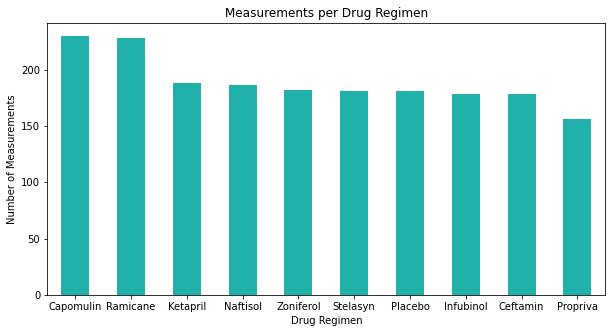

In [201]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_mice_counts = clean_all_data.groupby(['Drug Regimen']).count()['Timepoint']
drug_mice_counts_sorted = drug_mice_counts.sort_values(ascending = False)
# drug_mice_counts
plot = drug_mice_counts_sorted.plot.bar(y="Time Point", ylabel= 'Number of Measurements', color= 'lightseagreen',rot=0, figsize=(10,5), title= "Measurements per Drug Regimen")
# plt.xlabel('Drug Regimen', labelpad=10)
# plt.ylabel('Number of Measurements', labelpad=10)
# plt.title('Measurements per Drug Regimen')
plot


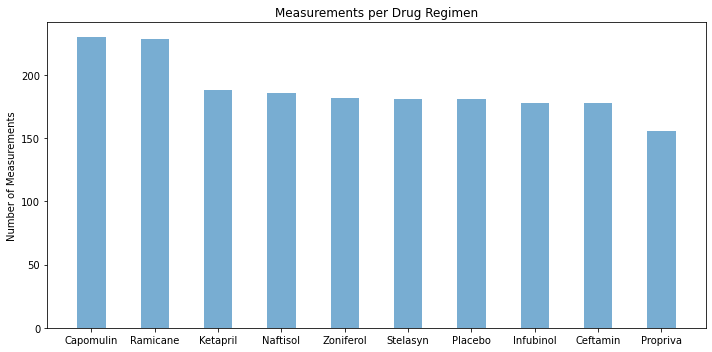

In [202]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize=(10,5))
counts = clean_all_data.groupby(['Drug Regimen']).count()['Timepoint']
counts_sorted = counts.sort_values(ascending = False)
counts_sorted
xlabels = counts_sorted.index.values
x = np.arange(len(xlabels))
plt.bar(x,counts_sorted, align='center', alpha=0.6, width=0.45)
plt.xticks(x,xlabels)
plt.ylabel("Number of Measurements")
plt.title('Measurements per Drug Regimen')

plt.tight_layout()


plt.show()



<AxesSubplot:title={'center':'Sex Distribution of Mice'}>

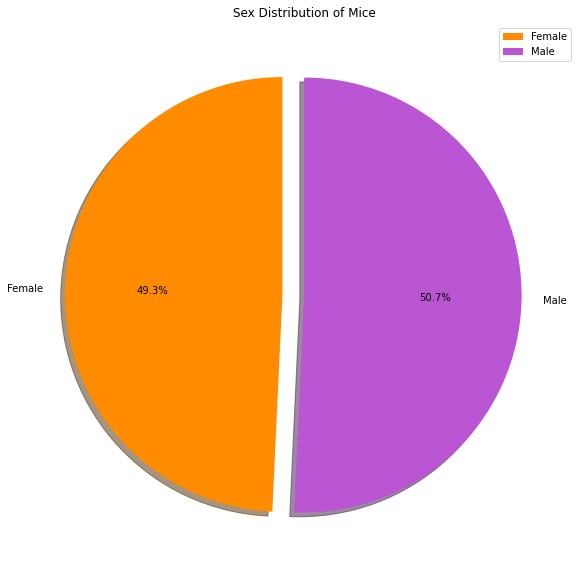

In [203]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = clean_all_data.groupby(['Sex']).count()
# mice_sex
pie = mice_sex.plot.pie(y="Mouse ID", ylabel= '', figsize=(10,10), explode=[0.1,0], shadow=True, colors = ['darkorange','mediumorchid'], autopct='%1.1f%%', startangle=90, title= "Sex Distribution of Mice")
pie


# plt.show()



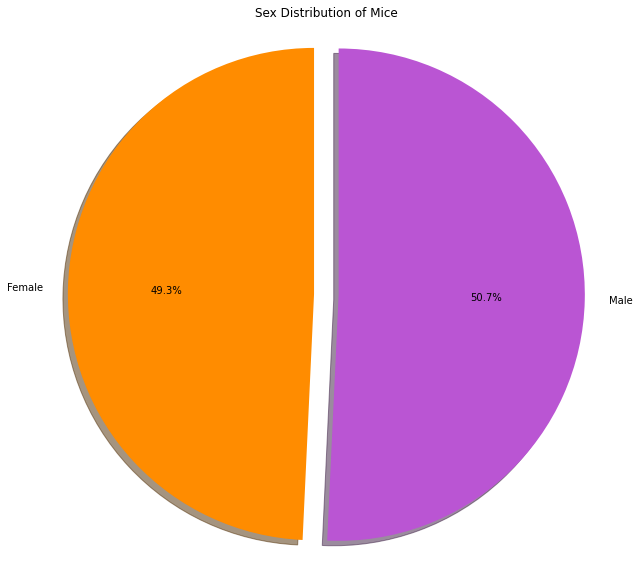

In [204]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_mice = clean_all_data.groupby(['Sex']).count()["Timepoint"]
plt.figure(figsize=(10,10))
labels = sex_mice.index.values
explode = [0.1,0]
my_colors = ['darkorange','mediumorchid']
plt.pie(sex_mice, labels=labels,startangle=90, explode=explode, shadow=True, colors=my_colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Sex Distribution of Mice')

plt.show()


## Quartiles, Outliers and Boxplots

In [205]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# 
#  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [206]:
last_timepoint = clean_all_data.groupby(['Mouse ID']).max()['Timepoint']
timepoint_tumor = clean_all_data.merge(last_timepoint,how='right')
last_timepoint_tumor = timepoint_tumor[['Drug Regimen','Mouse ID','Timepoint', 'Tumor Volume (mm3)']]
trx = ['Capomulin','Ramicane','Infubinol','Ceftamin']
subset_last_timepoint_tumor= last_timepoint_tumor[last_timepoint_tumor['Drug Regimen'].isin(trx)]
subset_last_tpt_tumor_dropped = subset_last_timepoint_tumor.drop(['Mouse ID','Timepoint'],axis=1)
subset_last_tpt_tumor_dropped

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,22.050126
1,Capomulin,23.343598
2,Capomulin,28.484033
3,Capomulin,28.430964
4,Ramicane,29.128472
...,...,...
40246,Ceftamin,51.914910
40248,Infubinol,54.571076
40251,Ceftamin,55.025724
40252,Ceftamin,52.361982


In [207]:
# Put treatments into a list for for loop (and later for plot labels)
 # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
trx = ['Capomulin','Ramicane','Infubinol','Ceftamin']

i=0
for i in range(len(trx)):
    if trx[i] == 'Capomulin':
        capo_trx = subset_last_tpt_tumor_dropped['Drug Regimen'] == 'Capomulin'
        capo_df = subset_last_tpt_tumor_dropped[capo_trx]
    elif trx[i] == 'Ramicane':
        rami_trx = subset_last_tpt_tumor_dropped['Drug Regimen']== 'Ramicane'
        rami_df = subset_last_tpt_tumor_dropped[rami_trx]
    elif trx[i] == 'Infubinol':
        infu_trx = subset_last_tpt_tumor_dropped['Drug Regimen']== 'Infubinol'
        infu_df = subset_last_tpt_tumor_dropped[infu_trx]
    else:
        ceft_trx = subset_last_tpt_tumor_dropped['Drug Regimen']== 'Ceftamin'
        ceft_df = subset_last_tpt_tumor_dropped[ceft_trx]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

def IQR_calc(data):   #example taken from: https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414
    sorted(data)
    q1,q3 = np.percentile(data, [25,75])
    IQR = q3 -q1
    lower_range = q1 - (1.5*IQR)
    upper_range = q3 + (1.5*IQR)
    return q1,q3,IQR,lower_range,upper_range
IQR_calc(ceft_df['Tumor Volume (mm3)'])

capo_qs = IQR_calc(capo_df['Tumor Volume (mm3)'])

rami_qs = IQR_calc(rami_df['Tumor Volume (mm3)']) 


infu_qs = IQR_calc(infu_df['Tumor Volume (mm3)']) 


ceft_qs = IQR_calc(ceft_df['Tumor Volume (mm3)']) 
ceft_qs
types_stats=['Q1','Q3', 'IQR','Lower Range', 'Upper Range']

calcs_df = pd.DataFrame(types_stats)
calcs_df['Stats'] = types_stats

calcs_df[trx[0]]=capo_qs
calcs_df[trx[1]]=rami_qs
calcs_df[trx[2]]=infu_qs
calcs_df[trx[3]]=ceft_qs


calcs_df.drop(columns=0)
   
    

,Stats,Capomulin,Ramicane,Infubinol,Ceftamin
0,Q1,35.462691,33.562402,49.385574,49.406879
1,Q3,43.225671,43.047543,64.138725,63.469549
2,IQR,7.762981,9.485140,14.753151,14.062670
3,Lower Range,23.818220,19.334692,27.255847,28.312873
4,Upper Range,54.870142,57.275253,86.268452,84.563555


In [208]:
capo_outliers = []
for val in capo_df["Tumor Volume (mm3)"]:
    if val > capo_qs[4] and val not in capo_outliers:
        capo_outliers.append(val)
    if val < capo_qs[3] and val not in capo_outliers:
        capo_outliers.append(val)

for item in capo_outliers:
    print(f'The value {item:.2f} in Capomulin may be an outlier.')

rami_outliers = []
for val in rami_df["Tumor Volume (mm3)"]:
    if val > rami_qs[4] and val not in rami_outliers:
        rami_outliers.append(val)
    if val < rami_qs[3] and val not in rami_outliers:
        rami_outliers.append(val)

for item in rami_outliers:
    print(f'The value {item:.2f} in Ramicane may be an outlier.')

infu_outliers = []
for val in infu_df["Tumor Volume (mm3)"]:
    if val > infu_qs[4] and val not in infu_outliers:
        infu_outliers.append(val)
    if val < infu_qs[3] and val not in infu_outliers:
        infu_outliers.append(val)

for item in infu_outliers:
    print(f'The value {item:.2f} in Infubinol may be an outlier.')

ceft_outliers = []
for val in ceft_df["Tumor Volume (mm3)"]:
    if val > ceft_qs[4] and val not in ceft_outliers:
        ceft_outliers.append(val)
    if val < ceft_qs[3] and val not in ceft_outliers:
        ceft_outliers.append(val)

for item in ceft_outliers:
    print(f'The value {item:.2f} in Ceftamin may be an outlier.')



The value 23.34 in Capomulin may be an outlier.


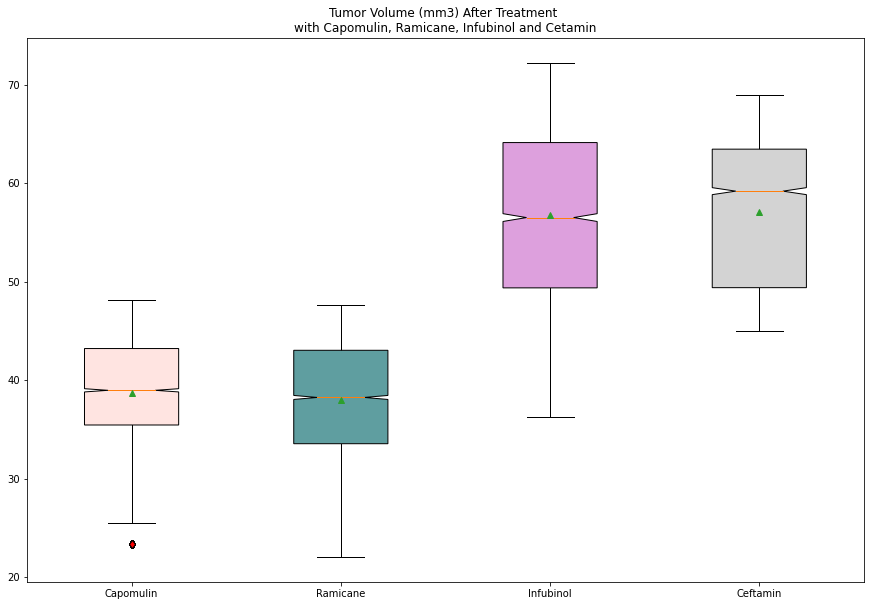

In [209]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
labels = trx
red_diamond = dict(markerfacecolor='r', marker='d')

fig, (ax1) = plt.subplots(figsize=(15,10))
boxplt1 = ax1.boxplot([capo_df["Tumor Volume (mm3)"],rami_df["Tumor Volume (mm3)"],infu_df["Tumor Volume (mm3)"],ceft_df["Tumor Volume (mm3)"]],flierprops=red_diamond, labels=labels, patch_artist=True, showmeans=True, notch=True)

colors = ['mistyrose', 'cadetblue', 'plum', 'lightgray'] #example followed: https://stackabuse.com/matplotlib-box-plot-tutorial-and-examples/
for patch, color in zip(boxplt1['boxes'],colors):
    patch.set_facecolor(color)

ax1.set_title('Tumor Volume (mm3) After Treatment \nwith Capomulin, Ramicane, Infubinol and Cetamin')

fig.subplots
plt.show()

## Line and Scatter Plots

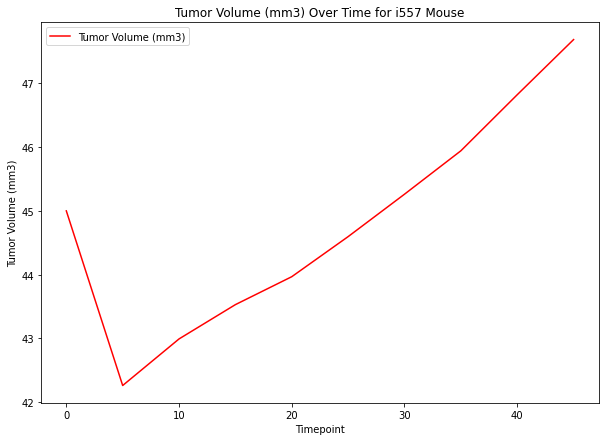

In [210]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mice = clean_all_data['Drug Regimen'] == "Capomulin"
capo_mice_df = clean_all_data[capo_mice]

filtered_capo_mice_df = capo_mice_df[capo_mice_df["Mouse ID"] == 'i557']
filtered_capo_mice_df

ax = plt.gca()

filtered_capo_mice_df.plot(kind='line', x="Timepoint",y="Tumor Volume (mm3)", ax=ax, color='r', figsize=(10,7))
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume (mm3) Over Time for i557 Mouse')
plt.show()



In [211]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capo_mice_df = capo_mice_df.groupby('Mouse ID').mean()
avg_capo_mice_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


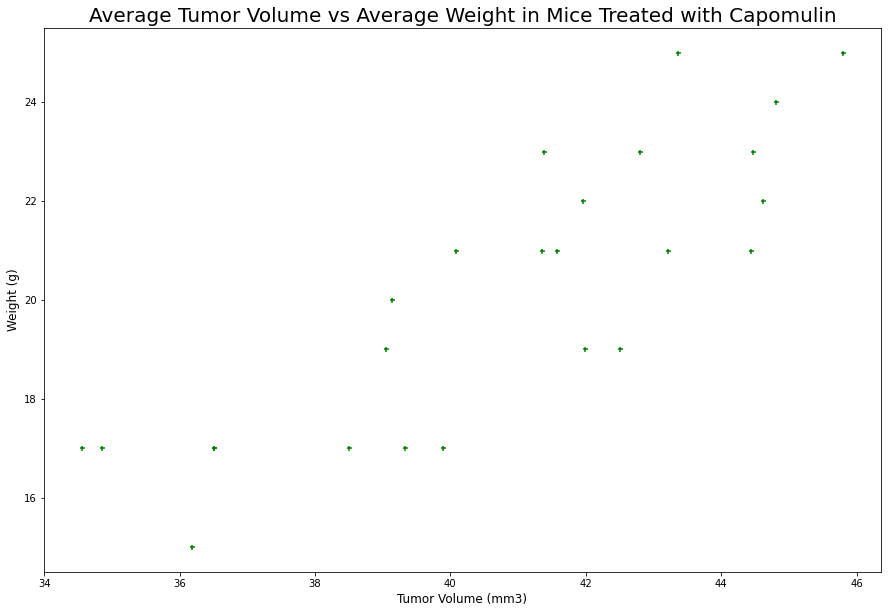

In [212]:

plt.figure(figsize=(15,10))
x_axis = avg_capo_mice_df["Tumor Volume (mm3)"] 
y_axis = avg_capo_mice_df["Weight (g)"]

plt.scatter(x_axis,y_axis, marker="+",color='g',s=25)

plt.xlabel('Tumor Volume (mm3)', size=12)
plt.ylabel('Weight (g)', size=12)
plt.title('Average Tumor Volume vs Average Weight in Mice Treated with Capomulin', size=20)
plt.show()

## Correlation and Regression

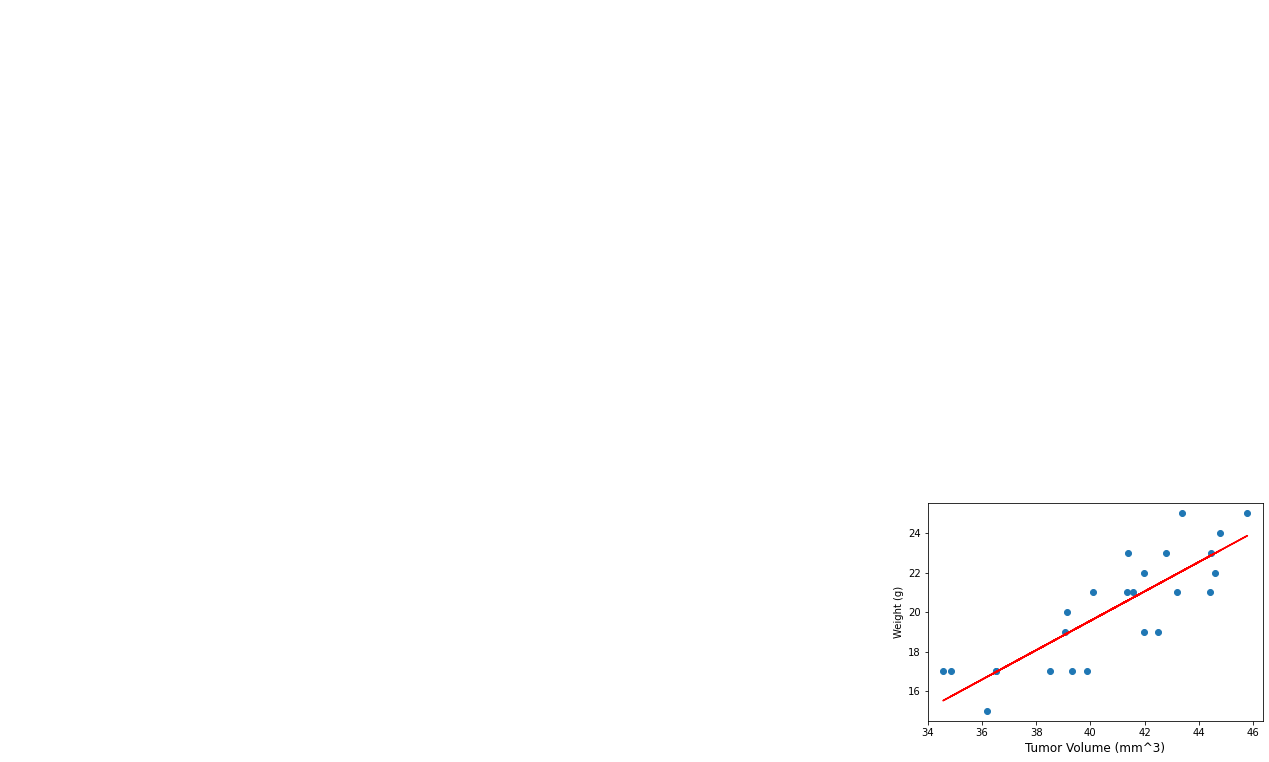

The r-squared is: 0.7088568047708717


In [213]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

plt.gca()

x_axis = avg_capo_mice_df["Tumor Volume (mm3)"] 
y_axis = avg_capo_mice_df["Weight (g)"]
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x +"+str(round(intercept,2))
plt.figsize=(10,5)
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="magenta")
plt.xlabel('Tumor Volume (mm^3)', size=12)
plt.ylabel('Weight (g)')

plt.show()
print(f"The r-squared is: {r_value**2}")

The correlation coefficient is: 0.84
The r-squared is: 0.71


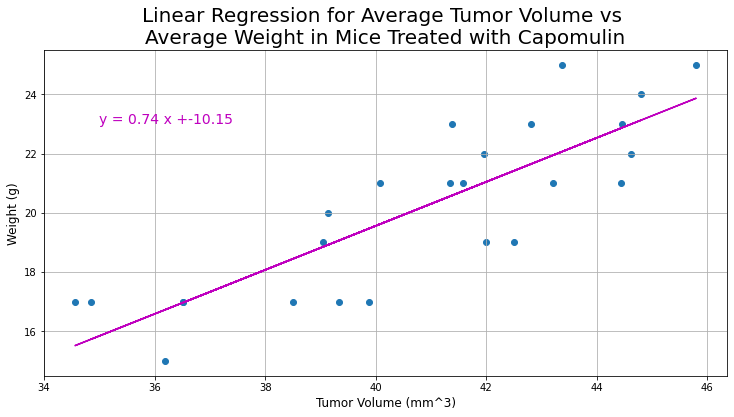

In [238]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
##Trying to fix all the white space in the image
correlation = st.pearsonr(avg_capo_mice_df["Tumor Volume (mm3)"],avg_capo_mice_df["Weight (g)"])
x_axis = avg_capo_mice_df["Tumor Volume (mm3)"] 
y_axis = avg_capo_mice_df["Weight (g)"]
(slope,intercept,r_value,pvalue,stderr)=st.linregress(x_axis,y_axis)
regress_values=x_axis*slope+intercept
line_eq="y = "+str(round(slope,2))+" x +"+str(round(intercept,2))



fig, ax = plt.subplots(figsize=(10,5))
ax = plt.scatter(x_axis,y_axis)
ax = plt.plot(x_axis,regress_values,"m-")
ax = plt.text(35, 23, line_eq, size=14, color='m')
plt.xlabel('Tumor Volume (mm^3)', size=12)
plt.ylabel('Weight (g)', size=12)
plt.tight_layout(pad=0)
plt.grid(True)
plt.title('Linear Regression for Average Tumor Volume vs \nAverage Weight in Mice Treated with Capomulin', size=20)

print(f'The correlation coefficient is: {correlation[0]:.2f}')
print(f"The r-squared is: {r_value**2:.2f}")


plt.show()